In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib  inline

In [62]:
model_name='AMOVE'
algo1_name='Algo1.'
algo2_name='Algo2.'

In [63]:
Ebert_results=pd.read_pickle('/home/divya/updated_code/Dataset/EbertResults.pkl')
with_sideInfoResults=pd.read_pickle('/home/divya/updated_code/Dataset/ucb_with_side_information.pkl')
withOut_sideInfoResults=pd.read_pickle('//home/divya/updated_code/Dataset/ucb_result_without_using_side_information.pkl')


In [64]:
dataset_n=['IMDb',' Yelp','QQP','SciTail','SNLI']


In [65]:
# assigning the required variables for EBERT Moder
# for qqp dataset
acc_qqp=Ebert_results['qqp'][0]
cost_qqp=Ebert_results['qqp'][1]
exit_qqp=Ebert_results['qqp'][2]
# for imdb dataset
acc_imdb=Ebert_results['imdb'][0]
cost_imdb=Ebert_results['imdb'][1]
exit_imdb=Ebert_results['imdb'][2]
# for snli dataset
acc_snli=Ebert_results['snli'][0]
cost_snli=Ebert_results['snli'][1]
exit_snli=Ebert_results['snli'][2]
# for scitail dataset
acc_scitail=Ebert_results['scitail'][0]
cost_scitail=Ebert_results['scitail'][1]
exit_scitail=Ebert_results['scitail'][2]
# for yelp dataset
acc_yelp=Ebert_results['yelp'][0]
cost_yelp=Ebert_results['yelp'][1]
exit_yelp=Ebert_results['yelp'][2]



In [66]:
def plot_accuracy_cost_withSideInfo(op_list,a,threshold_datasets,cos_qqp,acc_qqp,acc_snli,cos_snli,acc_scitail,cos_scitail,acc_imdb,cos_imdb,acc_yelp,cos_yelp,dict_results=with_sideInfoResults):
    scitail_acc_thr_our=[]
    snli_acc_thr_our=[]
    imdb_acc_thr_our=[]
    qqp_acc_thr_our=[]
    yelp_acc_thr_our=[]
    scitail_cost_thr_our=[]
    snli_cost_thr_our=[] 
    imdb_cost_thr_our=[]
    qqp_cost_thr_our=[]
    yelp_cost_thr_our=[]
    scitail_opt_thr_our=[]
    snli_opt_thr_our=[]
    imdb_opt_thr_our=[]
    qqp_opt_thr_our=[]
    yelp_opt_thr_our=[]
    scitail_offload_thr_our=[]
    snli_offload_thr_our=[]
    imdb_offload_thr_our=[]
    qqp_offlaod_thr_our=[]
    yelp_offload_thr_our=[]
    
    # values from dictionaries
    imdb_results=dict_results['imdb']
    scitail_results=dict_results['scitail']
    snli_results=dict_results['snli']
    qqp_results=dict_results['qqp']
    yelp_results=dict_results['yelp']
    for op in op_list:
        
        # storation of optimal layers
        scitail_opt_thr_our.append(scitail_results[op][0])
        snli_opt_thr_our.append(snli_results[op][0])
        imdb_opt_thr_our.append(imdb_results[op][0])
        qqp_opt_thr_our.append(qqp_results[op][0])
        yelp_opt_thr_our.append(yelp_results[op][0])
        # storation of accuracies
        scitail_acc_thr_our.append(scitail_results[op][1])
        snli_acc_thr_our.append(snli_results[op][1])
        imdb_acc_thr_our.append(imdb_results[op][1])
        qqp_acc_thr_our.append(qqp_results[op][1])
        yelp_acc_thr_our.append(yelp_results[op][1])
        #storation of number of offloading at optimal layer
        scitail_offload_thr_our.append(scitail_results[op][2])
        snli_offload_thr_our.append(snli_results[op][2])
        imdb_offload_thr_our.append(imdb_results[op][2])
        qqp_offlaod_thr_our.append(qqp_results[op][2])
        yelp_offload_thr_our.append(yelp_results[op][2])
        # storation of cost 
        scitail_cost_thr_our.append(10*scitail_results[op][3])
        snli_cost_thr_our.append(10*snli_results[op][3])
        imdb_cost_thr_our.append(10*imdb_results[op][3])
        qqp_cost_thr_our.append(10*qqp_results[op][3])
        yelp_cost_thr_our.append(10*yelp_results[op][3])
    # making arrays
    scitail_acc_thr_our=np.array(scitail_acc_thr_our)
    snli_acc_thr_our=np.array(snli_acc_thr_our)
    imdb_acc_thr_our=np.array(imdb_acc_thr_our)
    qqp_acc_thr_our=np.array(qqp_acc_thr_our)
    yelp_acc_thr_our=np.array(yelp_acc_thr_our) 
    # accuracy in percenage
    scitail_acc_thr_our_per=scitail_acc_thr_our*100
    snli_acc_thr_our_per=snli_acc_thr_our*100
    imdb_acc_thr_our_per=imdb_acc_thr_our*100
    qqp_acc_thr_our_per=qqp_acc_thr_our*100
    yelp_acc_thr_our_per=yelp_acc_thr_our*100
    #cost in k
    scitail_cost_thr_our=np.array(scitail_cost_thr_our)/1000
    snli_cost_thr_our=np.array(snli_cost_thr_our)/1000
    imdb_cost_thr_our=np.array(imdb_cost_thr_our)/1000
    qqp_cost_thr_our=np.array(qqp_cost_thr_our)/1000
    yelp_cost_thr_our=np.array(yelp_cost_thr_our)/1000
    
    #Accuracy and cost in EBERT model
    scitail_acc_thr_ebert=np.array([acc_scitail[-2] for _ in range(len(op_list))])
    snli_acc_thr_ebert=np.array([acc_snli[-4] for _ in range(len(op_list))])
    imdb_acc_thr_ebert=np.array([acc_imdb[-5] for _ in range(len(op_list))])
    qqp_acc_thr_ebert=np.array([acc_qqp[-4] for _ in range(len(op_list))])
    yelp_acc_thr_ebert=np.array([acc_yelp[-5] for _ in range(len(op_list))])
    # accuracy in percentage
    scitail_acc_thr_ebert_per=np.array([acc_scitail[-2] for _ in range(len(op_list))])*100
    snli_acc_thr_ebert_per=np.array([acc_snli[-4] for _ in range(len(op_list))])*100
    imdb_acc_thr_ebert_per=np.array([acc_imdb[-5] for _ in range(len(op_list))])*100
    qqp_acc_thr_ebert_per=np.array([acc_qqp[-4] for _ in range(len(op_list))])*100
    yelp_acc_thr_ebert_per=np.array([acc_yelp[-5] for _ in range(len(op_list))])*100
    
    scitail_cost_thr_ebert=np.array([cos_scitail[-2] for _ in range(len(op_list))])/1000
    snli_cost_thr_ebert=np.array([cos_snli[-4] for _ in range(len(op_list))])/1000
    imdb_cost_thr_ebert=np.array([cos_imdb[-5] for _ in range(len(op_list))])/1000
    qqp_cost_thr_ebert=np.array([cos_qqp[-4] for _ in range(len(op_list))])/1000
    yelp_cost_thr_ebert=np.array([cos_yelp[-5] for _ in range(len(op_list))])/1000
    
    dataset_n=['IMDb',' Yelp','QQP','SciTail','SNLI']
    acc_ebert=[imdb_acc_thr_ebert,yelp_acc_thr_ebert,qqp_acc_thr_ebert,scitail_acc_thr_ebert,snli_acc_thr_ebert]
    acc_ebert_per=[imdb_acc_thr_ebert_per,yelp_acc_thr_ebert_per,qqp_acc_thr_ebert_per,scitail_acc_thr_ebert_per,snli_acc_thr_ebert_per]
    acc_our=[imdb_acc_thr_our,yelp_acc_thr_our,qqp_acc_thr_our,scitail_acc_thr_our,snli_acc_thr_our]
    acc_our_per=[imdb_acc_thr_our_per,yelp_acc_thr_our_per,qqp_acc_thr_our_per,scitail_acc_thr_our_per,snli_acc_thr_our_per]
    cost_ebert=[imdb_cost_thr_ebert,yelp_cost_thr_ebert,qqp_cost_thr_ebert,scitail_cost_thr_ebert,snli_cost_thr_ebert]
    cost_our_model=[imdb_cost_thr_our,yelp_cost_thr_our,qqp_cost_thr_our,scitail_cost_thr_our,snli_cost_thr_our]
    
    print('Optimal layer on scitail dataset:',scitail_opt_thr_our)
    print('Optimal layer on Snli dataset:',snli_opt_thr_our)
    print('Optimal layer on imdb dataset:',imdb_opt_thr_our)
    print('Optimal layer on qqp dataset:',qqp_opt_thr_our)
    print('Optimal layer on scitail dataset:',yelp_opt_thr_our)
        
        
        
        
        
        
        
        
    
    

    # Create the figure
    def accuracy_plot(ax_name,dataset_name,op_list,accuracy_our,accuracy_ebert,threshold):
        ax_name.plot(op_list,accuracy_ebert,linestyle='-',color='r',marker='8',label='EBERT Model')
        ax_name.plot(op_list,accuracy_our,linestyle='--',color='b',marker='D',label=model_name)
        ax_name.set_xlabel('Offloading Cost(o)',fontsize=18)
        if dataset_name=='IMDb':
            ax_name.set_ylabel('Accuracy',fontsize=18)
        ax_name.tick_params(axis='x', labelsize=16)
        ax_name.tick_params(axis='y', labelsize=16)
        ax_name.set_title(f'Accuracy over {dataset_name}({algo2_name})',fontsize=18) # with threshold:{threshold[dataset_name]}')
        ax_name.grid()
        ax_name.legend(fontsize=14)
        

    def cost_plot(ax_name,dataset_name,op_list,cost_our_model,cost_ebert,threshold):
        ax_name.plot(op_list,cost_ebert,linestyle='-',color='g',marker='8',label='EBERT Model')
        ax_name.plot(op_list,cost_our_model,linestyle='--',color='b',marker='D',label=model_name)
        ax_name.set_xlabel('Offloading cost(o)',fontsize=18)
        ax_name.tick_params(axis='x', labelsize=16)
        ax_name.tick_params(axis='y', labelsize=16)
        if dataset_name=='IMDb':
            ax_name.set_ylabel('Cost (\u00D7 $\lambda$) (in k)',fontsize=18)
        ax_name.set_title(f'Cost over {dataset_name} ({algo2_name})',fontsize=18) #with threshold:{threshold[dataset_name]}')
        ax_name.grid()
        ax_name.legend(fontsize=14)
        
    def accuracy_plot_per(ax_name,dataset_name,op_list,accuracy_our,accuracy_ebert,threshold):
        ax_name.plot(op_list,accuracy_ebert,linestyle='-',color='r',marker='8',label='EBERT Model')
        ax_name.plot(op_list,accuracy_our,linestyle='--',color='b',marker='D',label=model_name)
        ax_name.set_xlabel('Offloading Cost(o)',fontsize=18)
        if dataset_name=='IMDb':
            ax_name.set_ylabel('Accuracy (in %)',fontsize=18)
        ax_name.tick_params(axis='x', labelsize=16)
        ax_name.tick_params(axis='y', labelsize=16)
        ax_name.set_title(f'Accuracy over {dataset_name}({algo2_name})',fontsize=18) # with threshold:{threshold[dataset_name]}')
        ax_name.grid()
        ax_name.legend(fontsize=14)
        
    # accuracy in % plots
    fig, ((ax1, ax2,ax3,ax4,ax5)) = plt.subplots(1, 5,figsize=(25, 5))
    
    l=[ax1, ax2,ax3,ax4,ax5]
    
    for i in range(5):
        accuracy_plot_per(l[i],dataset_n[i],op_list,acc_our_per[i],acc_ebert_per[i],threshold_datasets)
    fig.tight_layout()
    fig.savefig("/home/divya/updated_code/Plots/accuracy_plot_percentage_withSideInfo.pdf", format="pdf", bbox_inches="tight")
    fig.show()
    # accuracy  plots
    fig, ((ax1, ax2,ax3,ax4,ax5)) = plt.subplots(1, 5,figsize=(25, 5))
    
    l=[ax1, ax2,ax3,ax4,ax5]
    
    for i in range(5):
        accuracy_plot(l[i],dataset_n[i],op_list,acc_our[i],acc_ebert[i],threshold_datasets)
    fig.tight_layout()
    fig.savefig("/home/divya/updated_code/Plots/accuracy_plot_normal_withSideInfo.pdf", format="pdf", bbox_inches="tight")
    fig.show()
    
    #cost(in k) plots
    fig, ((ax1, ax2,ax3,ax4,ax5)) = plt.subplots(1, 5,figsize=(25, 5))
    
    l=[ax1, ax2,ax3,ax4,ax5]
    
    for i in range(5):
        cost_plot(l[i],dataset_n[i],op_list,cost_our_model[i],cost_ebert[i],threshold_datasets)
    fig.tight_layout()
    fig.savefig("/home/divya/updated_code/Plots/cost_plot_withSideInfo.pdf", format="pdf", bbox_inches="tight")
    fig.show()

Optimal layer on scitail dataset: [0, 0, 0, 0, 0, 0, 0, 0, 0]
Optimal layer on Snli dataset: [0, 0, 0, 0, 0, 2, 2, 2, 2]
Optimal layer on imdb dataset: [0, 0, 0, 0, 0, 2, 2, 2, 2]
Optimal layer on qqp dataset: [0, 0, 0, 0, 0, 0, 0, 0, 3]
Optimal layer on scitail dataset: [0, 0, 0, 0, 0, 2, 2, 2, 2]


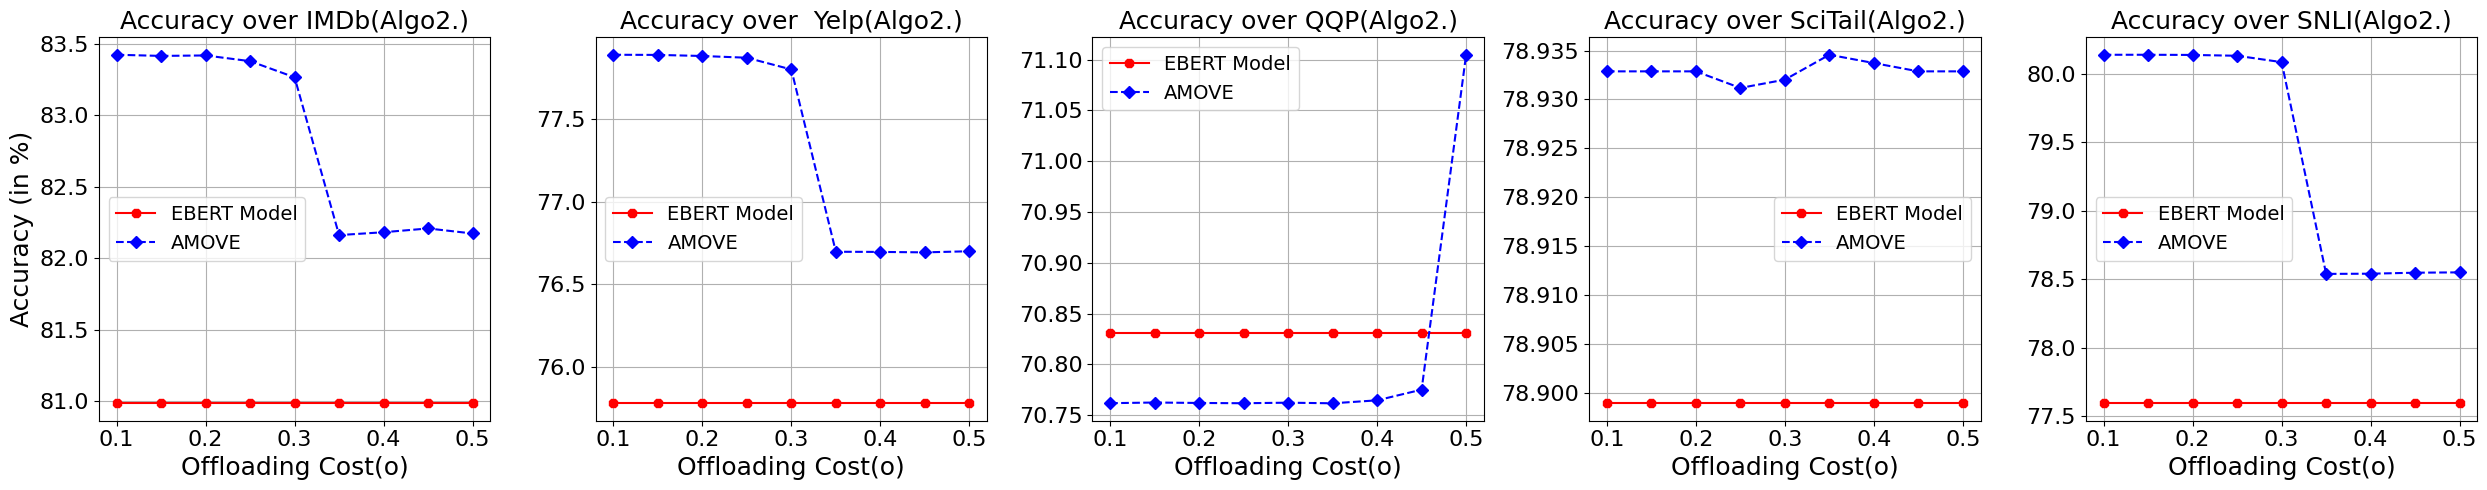

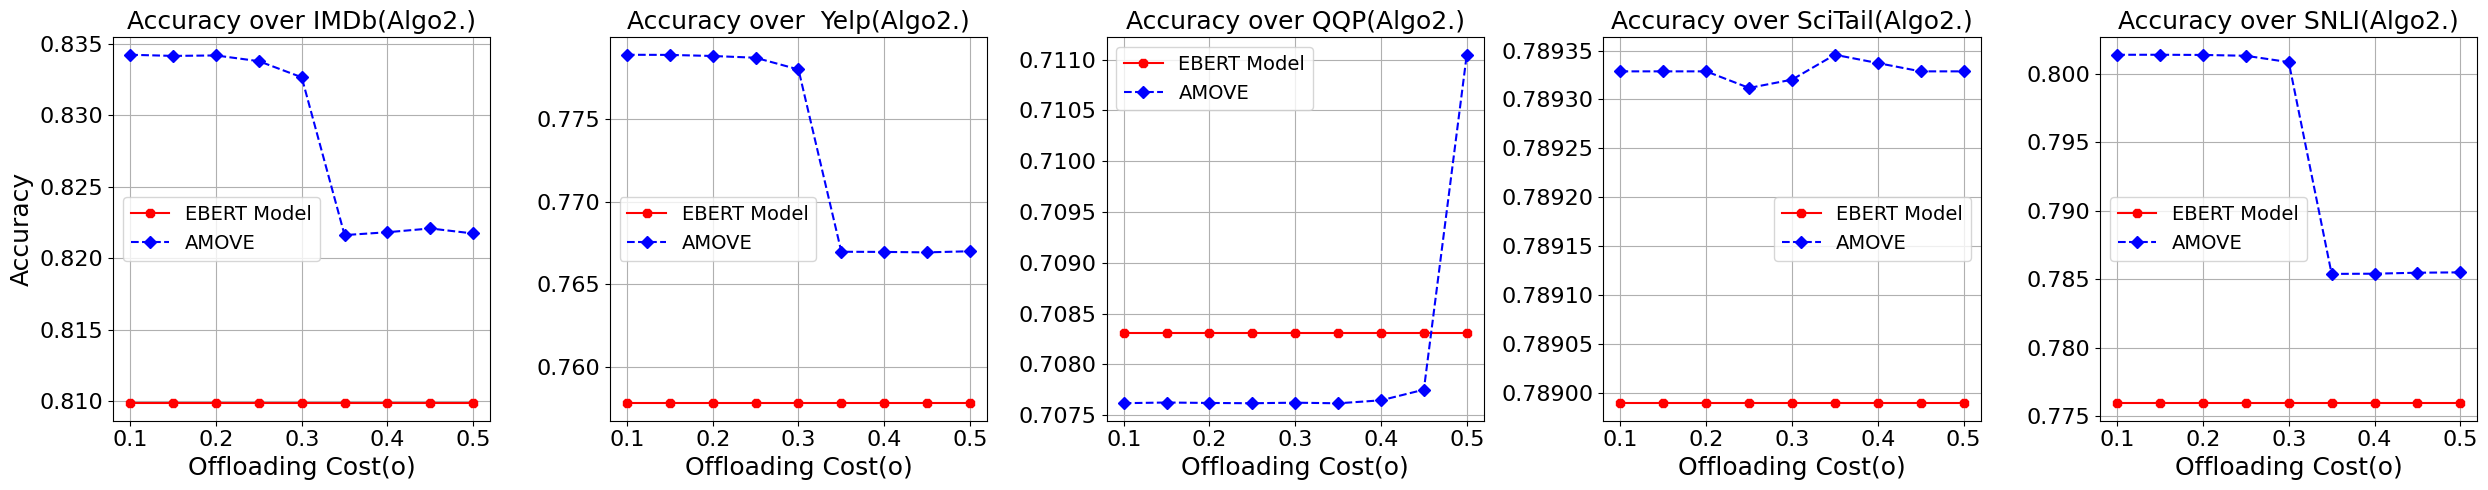

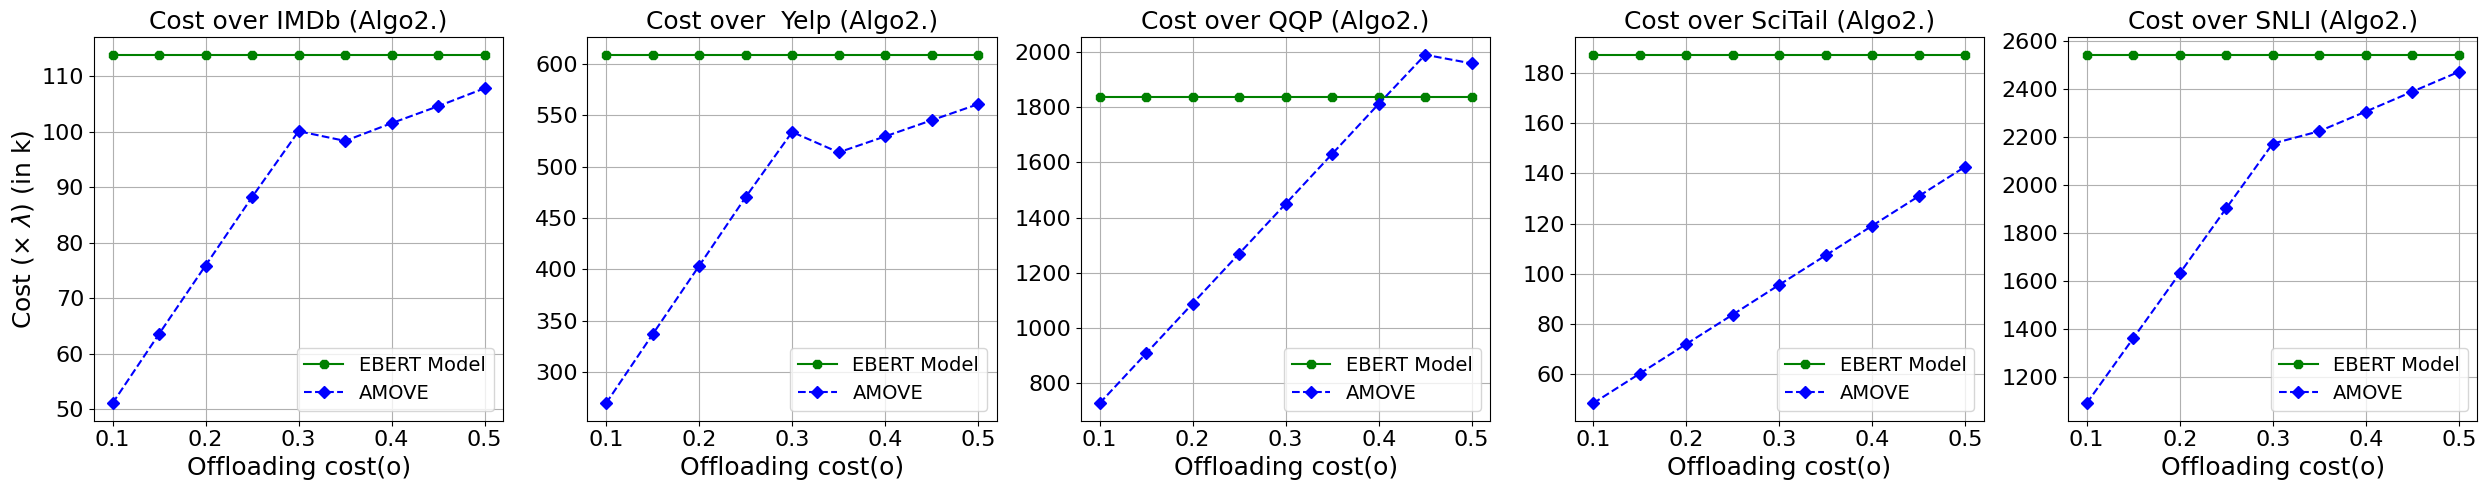

In [67]:
op_list=[0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]
threshold_datasets={'IMDb':0.7,'Yelp':0.7,'QQP':0.75,'SciTail':0.85,'SNLI':0.75}
plot_accuracy_cost_withSideInfo(op_list,1/10,threshold_datasets,cost_qqp,acc_qqp,acc_snli,cost_snli,acc_scitail,cost_scitail,acc_imdb,cost_imdb,acc_yelp,cost_yelp,dict_results=with_sideInfoResults)

In [68]:
def plot_accuracy_cost_withOutSideInfo(op_list,a,threshold_datasets,cos_qqp,acc_qqp,acc_snli,cos_snli,acc_scitail,cos_scitail,acc_imdb,cos_imdb,acc_yelp,cos_yelp,dict_results=withOut_sideInfoResults):
    scitail_acc_thr_our=[]
    snli_acc_thr_our=[]
    imdb_acc_thr_our=[]
    qqp_acc_thr_our=[]
    yelp_acc_thr_our=[]
    scitail_cost_thr_our=[]
    snli_cost_thr_our=[] 
    imdb_cost_thr_our=[]
    qqp_cost_thr_our=[]
    yelp_cost_thr_our=[]
    scitail_opt_thr_our=[]
    snli_opt_thr_our=[]
    imdb_opt_thr_our=[]
    qqp_opt_thr_our=[]
    yelp_opt_thr_our=[]
    scitail_offload_thr_our=[]
    snli_offload_thr_our=[]
    imdb_offload_thr_our=[]
    qqp_offlaod_thr_our=[]
    yelp_offload_thr_our=[]
    
    # values from dictionaries
    imdb_results=dict_results['imdb']
    scitail_results=dict_results['scitail']
    snli_results=dict_results['snli']
    qqp_results=dict_results['qqp']
    yelp_results=dict_results['yelp']
    for op in op_list:
        
        # storation of optimal layers
        scitail_opt_thr_our.append(scitail_results[op][0])
        snli_opt_thr_our.append(snli_results[op][0])
        imdb_opt_thr_our.append(imdb_results[op][0])
        qqp_opt_thr_our.append(qqp_results[op][0])
        yelp_opt_thr_our.append(yelp_results[op][0])
        # storation of accuracies
        scitail_acc_thr_our.append(scitail_results[op][1])
        snli_acc_thr_our.append(snli_results[op][1])
        imdb_acc_thr_our.append(imdb_results[op][1])
        qqp_acc_thr_our.append(qqp_results[op][1])
        yelp_acc_thr_our.append(yelp_results[op][1])
        #storation of number of offloading at optimal layer
        scitail_offload_thr_our.append(scitail_results[op][2])
        snli_offload_thr_our.append(snli_results[op][2])
        imdb_offload_thr_our.append(imdb_results[op][2])
        qqp_offlaod_thr_our.append(qqp_results[op][2])
        yelp_offload_thr_our.append(yelp_results[op][2])
        # storation of cost 
        scitail_cost_thr_our.append(10*scitail_results[op][3])
        snli_cost_thr_our.append(10*snli_results[op][3])
        imdb_cost_thr_our.append(10*imdb_results[op][3])
        qqp_cost_thr_our.append(10*qqp_results[op][3])
        yelp_cost_thr_our.append(10*yelp_results[op][3])
    # making arrays
    scitail_acc_thr_our=np.array(scitail_acc_thr_our)
    snli_acc_thr_our=np.array(snli_acc_thr_our)
    imdb_acc_thr_our=np.array(imdb_acc_thr_our)
    qqp_acc_thr_our=np.array(qqp_acc_thr_our)
    yelp_acc_thr_our=np.array(yelp_acc_thr_our) 
    # accuracy in percenage
    scitail_acc_thr_our_per=scitail_acc_thr_our*100
    snli_acc_thr_our_per=snli_acc_thr_our*100
    imdb_acc_thr_our_per=imdb_acc_thr_our*100
    qqp_acc_thr_our_per=qqp_acc_thr_our*100
    yelp_acc_thr_our_per=yelp_acc_thr_our*100
    #cost in k
    scitail_cost_thr_our=np.array(scitail_cost_thr_our)/1000
    snli_cost_thr_our=np.array(snli_cost_thr_our)/1000
    imdb_cost_thr_our=np.array(imdb_cost_thr_our)/1000
    qqp_cost_thr_our=np.array(qqp_cost_thr_our)/1000
    yelp_cost_thr_our=np.array(yelp_cost_thr_our)/1000
    
    #Accuracy and cost in EBERT model
    scitail_acc_thr_ebert=np.array([acc_scitail[-2] for _ in range(len(op_list))])
    snli_acc_thr_ebert=np.array([acc_snli[-4] for _ in range(len(op_list))])
    imdb_acc_thr_ebert=np.array([acc_imdb[-5] for _ in range(len(op_list))])
    qqp_acc_thr_ebert=np.array([acc_qqp[-4] for _ in range(len(op_list))])
    yelp_acc_thr_ebert=np.array([acc_yelp[-5] for _ in range(len(op_list))])
    # accuracy in percentage
    scitail_acc_thr_ebert_per=np.array([acc_scitail[-2] for _ in range(len(op_list))])*100
    snli_acc_thr_ebert_per=np.array([acc_snli[-4] for _ in range(len(op_list))])*100
    imdb_acc_thr_ebert_per=np.array([acc_imdb[-5] for _ in range(len(op_list))])*100
    qqp_acc_thr_ebert_per=np.array([acc_qqp[-4] for _ in range(len(op_list))])*100
    yelp_acc_thr_ebert_per=np.array([acc_yelp[-5] for _ in range(len(op_list))])*100
    
    scitail_cost_thr_ebert=np.array([cos_scitail[-2] for _ in range(len(op_list))])/1000
    snli_cost_thr_ebert=np.array([cos_snli[-4] for _ in range(len(op_list))])/1000
    imdb_cost_thr_ebert=np.array([cos_imdb[-5] for _ in range(len(op_list))])/1000
    qqp_cost_thr_ebert=np.array([cos_qqp[-4] for _ in range(len(op_list))])/1000
    yelp_cost_thr_ebert=np.array([cos_yelp[-5] for _ in range(len(op_list))])/1000
    
    dataset_n=['IMDb',' Yelp','QQP','SciTail','SNLI']
    acc_ebert=[imdb_acc_thr_ebert,yelp_acc_thr_ebert,qqp_acc_thr_ebert,scitail_acc_thr_ebert,snli_acc_thr_ebert]
    acc_ebert_per=[imdb_acc_thr_ebert_per,yelp_acc_thr_ebert_per,qqp_acc_thr_ebert_per,scitail_acc_thr_ebert_per,snli_acc_thr_ebert_per]
    acc_our=[imdb_acc_thr_our,yelp_acc_thr_our,qqp_acc_thr_our,scitail_acc_thr_our,snli_acc_thr_our]
    acc_our_per=[imdb_acc_thr_our_per,yelp_acc_thr_our_per,qqp_acc_thr_our_per,scitail_acc_thr_our_per,snli_acc_thr_our_per]
    cost_ebert=[imdb_cost_thr_ebert,yelp_cost_thr_ebert,qqp_cost_thr_ebert,scitail_cost_thr_ebert,snli_cost_thr_ebert]
    cost_our_model=[imdb_cost_thr_our,yelp_cost_thr_our,qqp_cost_thr_our,scitail_cost_thr_our,snli_cost_thr_our]
    
    print('Optimal layer on scitail dataset:',scitail_opt_thr_our)
    print('Optimal layer on Snli dataset:',snli_opt_thr_our)
    print('Optimal layer on imdb dataset:',imdb_opt_thr_our)
    print('Optimal layer on qqp dataset:',qqp_opt_thr_our)
    print('Optimal layer on scitail dataset:',yelp_opt_thr_our)
        
        
        
        
        
        
        
        
    
    

    # Create the figure
    def accuracy_plot(ax_name,dataset_name,op_list,accuracy_our,accuracy_ebert,threshold):
        ax_name.plot(op_list,accuracy_ebert,linestyle='-',color='r',marker='8',label='EBERT Model')
        ax_name.plot(op_list,accuracy_our,linestyle='--',color='b',marker='D',label=model_name)
        ax_name.set_xlabel('Offloading Cost(o)',fontsize=18)
        if dataset_name=='IMDb':
            ax_name.set_ylabel('Accuracy',fontsize=18)
        ax_name.tick_params(axis='x', labelsize=16)
        ax_name.tick_params(axis='y', labelsize=16)
        ax_name.set_title(f'Accuracy over {dataset_name} ({algo1_name})',fontsize=18) # with threshold:{threshold[dataset_name]}')
        ax_name.grid()
        ax_name.legend(fontsize=14)
        

    def cost_plot(ax_name,dataset_name,op_list,cost_our_model,cost_ebert,threshold):
        ax_name.plot(op_list,cost_ebert,linestyle='-',color='g',marker='8',label='EBERT Model')
        ax_name.plot(op_list,cost_our_model,linestyle='--',color='b',marker='D',label=model_name)
        ax_name.set_xlabel('Offloading cost(o)',fontsize=18)
        ax_name.tick_params(axis='x', labelsize=16)
        ax_name.tick_params(axis='y', labelsize=16)
        if dataset_name=='IMDb':
            ax_name.set_ylabel('Cost (\u00D7 $\lambda$) (in k)',fontsize=18)
        ax_name.set_title(f'Cost over {dataset_name} ({algo1_name})',fontsize=18) #with threshold:{threshold[dataset_name]}')
        ax_name.grid()
        ax_name.legend(fontsize=14)
        
    def accuracy_plot_per(ax_name,dataset_name,op_list,accuracy_our,accuracy_ebert,threshold):
        ax_name.plot(op_list,accuracy_ebert,linestyle='-',color='r',marker='8',label='EBERT Model')
        ax_name.plot(op_list,accuracy_our,linestyle='--',color='b',marker='D',label=model_name)
        ax_name.set_xlabel('Offloading Cost(o)',fontsize=18)
        if dataset_name=='IMDb':
            ax_name.set_ylabel('Accuracy (in %)',fontsize=18)
        ax_name.tick_params(axis='x', labelsize=16)
        ax_name.tick_params(axis='y', labelsize=16)
        ax_name.set_title(f'Accuracy over {dataset_name}({algo1_name})',fontsize=18) # with threshold:{threshold[dataset_name]}')
        ax_name.grid()
        ax_name.legend(fontsize=14)
        
    # accuracy in % plots
    fig, ((ax1, ax2,ax3,ax4,ax5)) = plt.subplots(1, 5,figsize=(25, 5))
    
    l=[ax1, ax2,ax3,ax4,ax5]
    
    for i in range(5):
        accuracy_plot_per(l[i],dataset_n[i],op_list,acc_our_per[i],acc_ebert_per[i],threshold_datasets)
    fig.tight_layout()
    fig.savefig("/home/divya/updated_code/Plots/accuracy_plot_percentage_withOutSideInfo.pdf", format="pdf", bbox_inches="tight")
    fig.show()
    # accuracy  plots
    fig, ((ax1, ax2,ax3,ax4,ax5)) = plt.subplots(1, 5,figsize=(25, 5))
    
    l=[ax1, ax2,ax3,ax4,ax5]
    
    for i in range(5):
        accuracy_plot(l[i],dataset_n[i],op_list,acc_our[i],acc_ebert[i],threshold_datasets)
    fig.tight_layout()
    fig.savefig("/home/divya/updated_code/Plots/accuracy_plot_normal_withOutSideInfo.pdf", format="pdf", bbox_inches="tight")
    fig.show()
    
    #cost(in k) plots
    fig, ((ax1, ax2,ax3,ax4,ax5)) = plt.subplots(1, 5,figsize=(25, 5))
    
    l=[ax1, ax2,ax3,ax4,ax5]
    
    for i in range(5):
        cost_plot(l[i],dataset_n[i],op_list,cost_our_model[i],cost_ebert[i],threshold_datasets)
    fig.tight_layout()
    fig.savefig("/home/divya/updated_code/Plots/cost_plot_withOutSideInfo.pdf", format="pdf", bbox_inches="tight")
    fig.show()

Optimal layer on scitail dataset: [0, 0, 0, 0, 0, 0, 0, 0, 0]
Optimal layer on Snli dataset: [0, 0, 0, 0, 0, 2, 2, 2, 2]
Optimal layer on imdb dataset: [0, 0, 0, 0, 0, 2, 2, 2, 2]
Optimal layer on qqp dataset: [0, 0, 0, 0, 0, 0, 0, 0, 3]
Optimal layer on scitail dataset: [0, 0, 0, 0, 0, 2, 2, 2, 2]


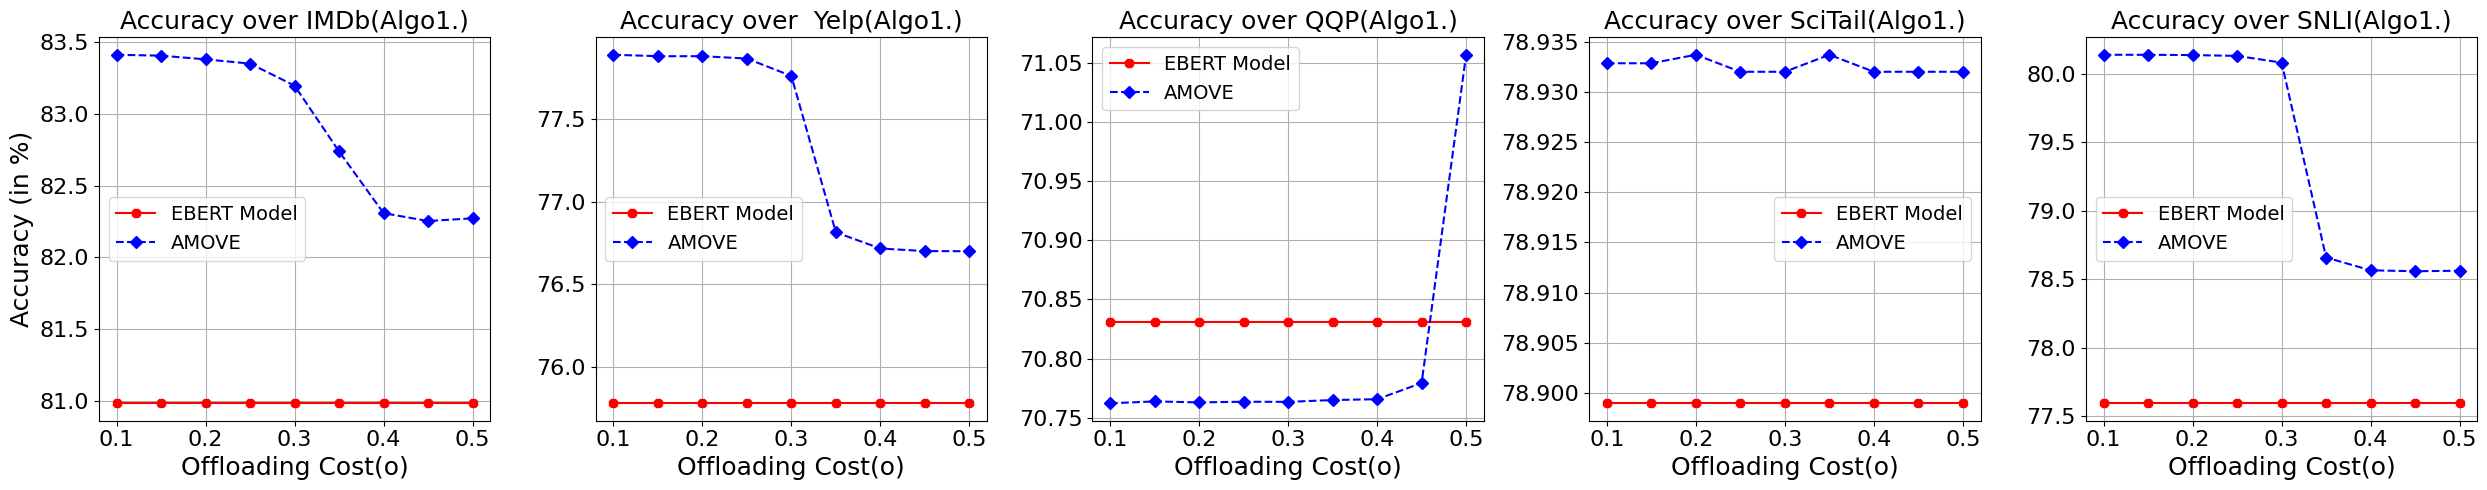

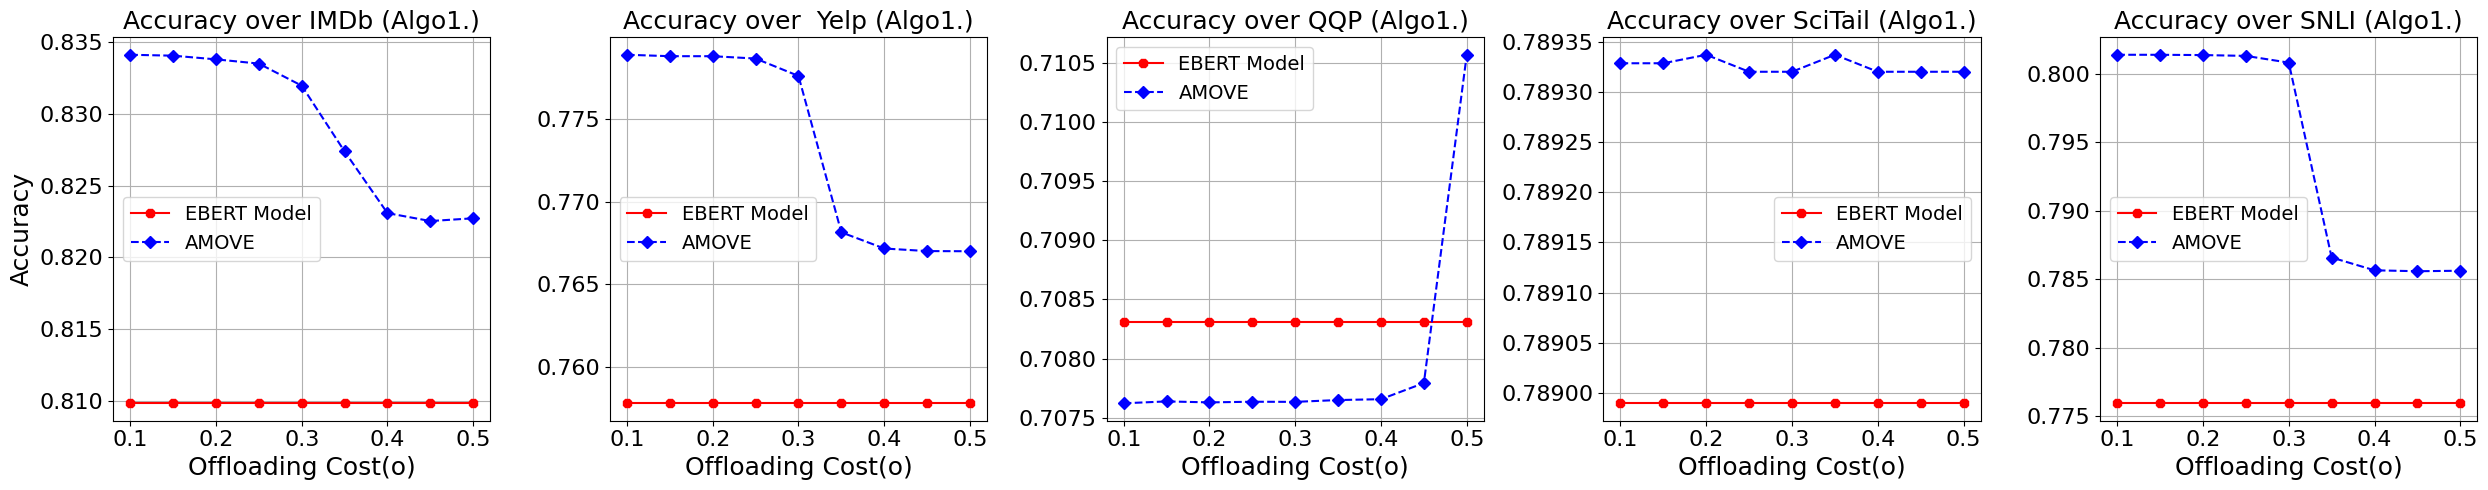

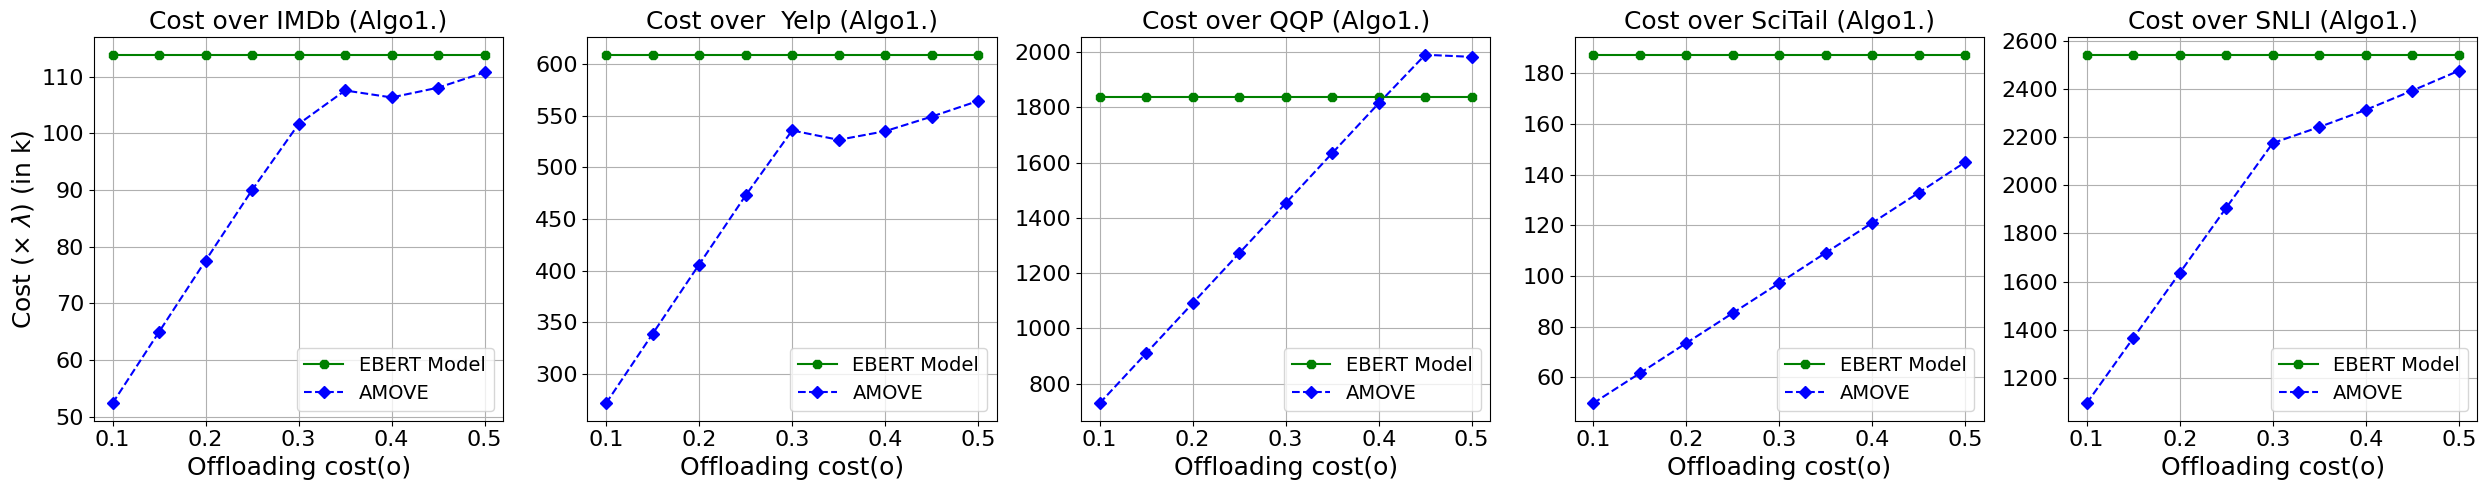

In [69]:
op_list=[0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]
threshold_datasets={'IMDb':0.7,'Yelp':0.7,'QQP':0.75,'SciTail':0.85,'SNLI':0.75}
plot_accuracy_cost_withOutSideInfo(op_list,1/10,threshold_datasets,cost_qqp,acc_qqp,acc_snli,cost_snli,acc_scitail,cost_scitail,acc_imdb,cost_imdb,acc_yelp,cost_yelp)

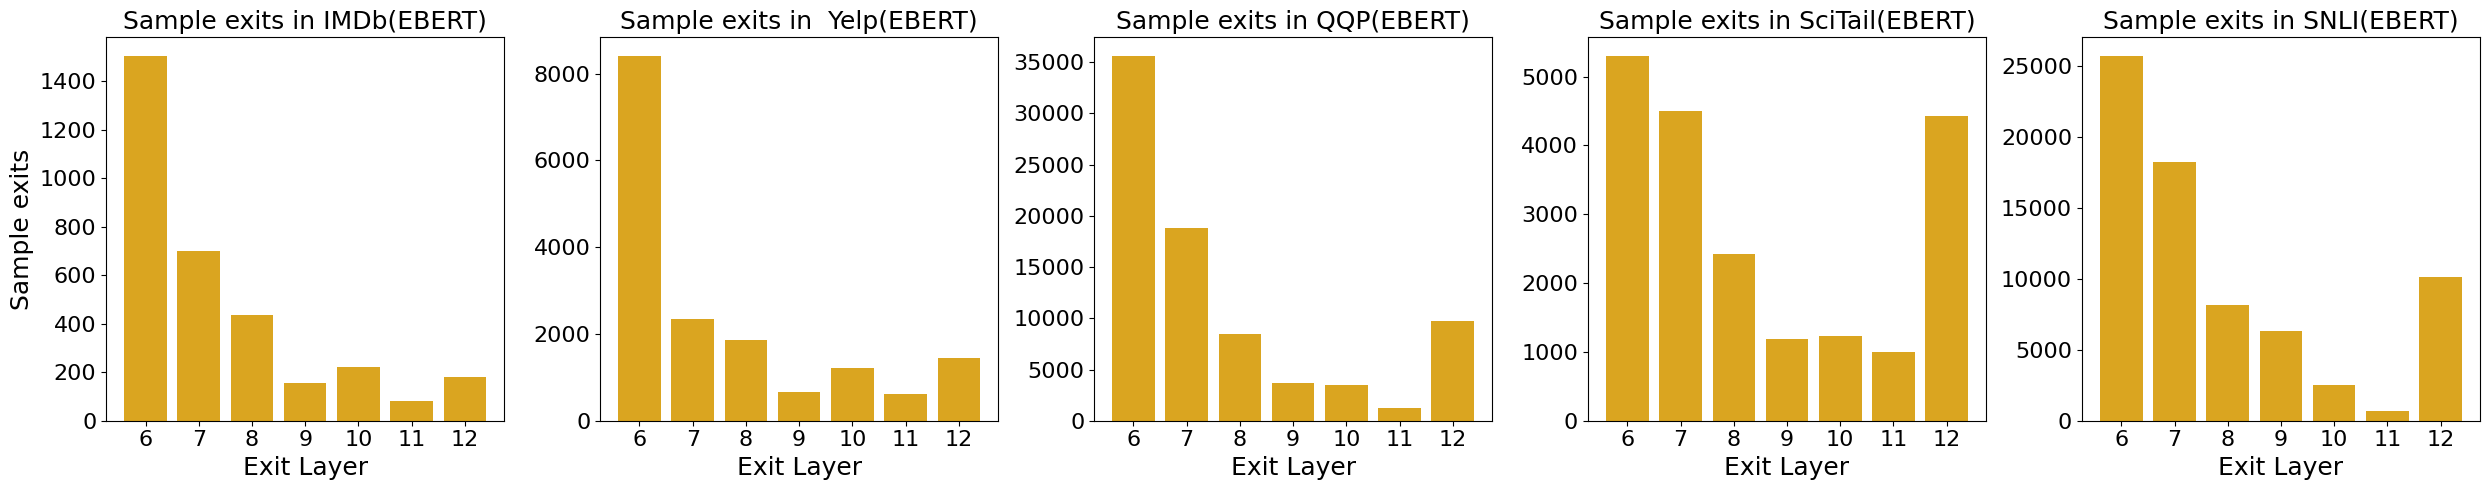

In [70]:
def Ebert_exit_plot(ax_name,dataset_name,n_layers,exit_samples):
    ax_name.bar([i for i in range(6,13)],exit_samples,color='goldenrod')
    ax_name.set_xlabel('Exit Layer',fontsize=18)
    ax_name.set_xticks([i+1 for i in range(5,12)])   
    if dataset_name=='IMDb':
        ax_name.set_ylabel('Sample exits',fontsize=18)
    ax_name.tick_params(axis='x', labelsize=16)
    ax_name.tick_params(axis='y', labelsize=16)
    ax_name.set_title(f'Sample exits in {dataset_name}(EBERT)',fontsize=18) # with threshold:{threshold[dataset_name]}')
    
    

dataset_n=['IMDb',' Yelp','QQP','SciTail','SNLI']
exit_samples_dataset=[exit_imdb[-5][5:],exit_yelp[-5][5:],exit_qqp[-4][5:],exit_scitail[-2][5:],exit_snli[-4][5:]]

   
fig, ((ax1, ax2,ax3,ax4,ax5)) = plt.subplots(1, 5,figsize=(25, 5))
    
l=[ax1, ax2,ax3,ax4,ax5]

for i in range(5):
    Ebert_exit_plot(l[i],dataset_n[i],12,exit_samples_dataset[i])
fig.tight_layout()
fig.savefig("/home/divya/updated_code/Plots/bar_plot_Ebert.pdf", format="pdf", bbox_inches="tight")
fig.show()

In [71]:
results_confidence=pd.read_pickle('/home/divya/updated_code/Dataset/confidence_label_dict.pkl')
results_confidence.keys()

dict_keys(['qqp', 'scitail', 'snli', 'imdb', 'yelp'])

In [72]:
df_imdb=results_confidence['imdb']
df_yelp=results_confidence['yelp']
df_qqp=results_confidence['qqp']
df_scitail=results_confidence['scitail']
df_snli=results_confidence['snli']


In [73]:
def difference_columns(dataframe,layer1,layer2):
    dataframe[f'{layer1}th_confidence']=dataframe[layer1-1].apply(lambda x: max(x))
    dataframe[f'{layer2}th_confidence']=dataframe[layer2-1].apply(lambda x: max(x))
    dataframe['difference_confidence']=dataframe[f'{layer2}th_confidence']-dataframe[f'{layer1}th_confidence']
    
    

In [74]:
dataframes=[df_imdb,df_yelp,df_qqp,df_scitail,df_snli]
for dataframe in dataframes:
    difference_columns(dataframe,6,12)
    

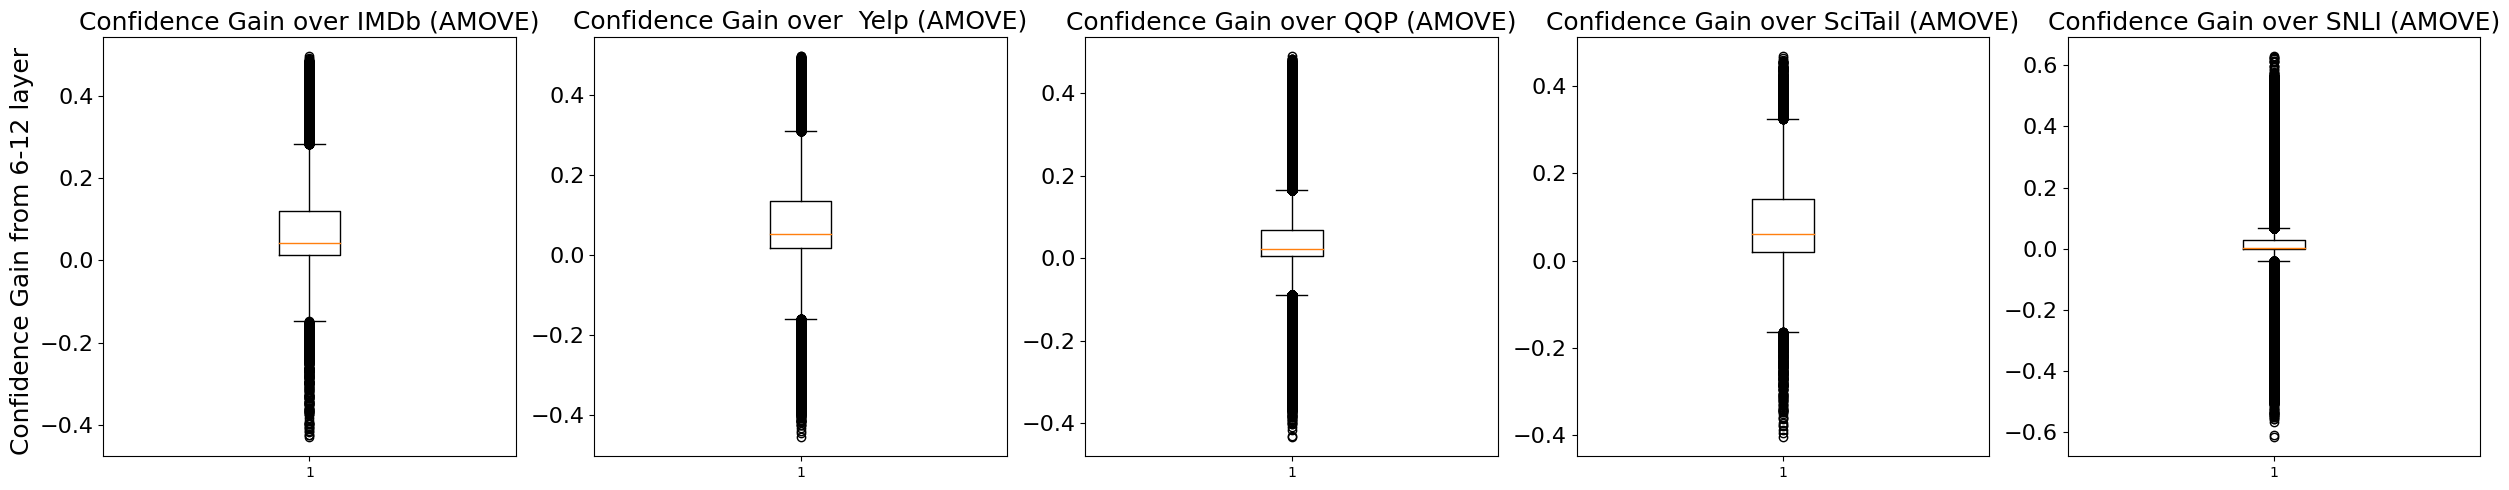

In [75]:
def box_plot(ax_name,dataset_name,difference_values):
        ax_name.boxplot(difference_values)
       
        ax_name.tick_params(axis='y', labelsize=16)
        if dataset_name=='IMDb':
            ax_name.set_ylabel('Confidence Gain from 6-12 layer ',fontsize=18)
        ax_name.set_title(f'Confidence Gain over {dataset_name} ({model_name})',fontsize=18) #with threshold:{threshold[dataset_name]}')

        
dataset_n=['IMDb',' Yelp','QQP','SciTail','SNLI']
difference_val=[df_imdb['difference_confidence'],df_yelp['difference_confidence'],df_qqp['difference_confidence'],df_scitail['difference_confidence'],df_snli['difference_confidence']]
   
fig, ((ax1, ax2,ax3,ax4,ax5)) = plt.subplots(1, 5,figsize=(25, 5))
    
l=[ax1, ax2,ax3,ax4,ax5]

for i in range(5):
    box_plot(l[i],dataset_n[i],difference_val[i])
fig.tight_layout()
fig.savefig("/home/divya/updated_code/Plots/box_plot_Confidence_gain.pdf", format="pdf", bbox_inches="tight")
fig.show()

$\huge \text{Bar plot for Exiting-offloading:}$

In [76]:
# Len of total datapoints
total_len=[]
total_len.append(len(df_imdb))
total_len.append(len(df_yelp))
total_len.append(len(df_qqp))
total_len.append(len(df_scitail))
total_len.append(len(df_snli))
total_len=np.array(total_len)

$\large \text{With side Information:}$

In [77]:

# values from dictionaries
imdb_results=with_sideInfoResults['imdb']
scitail_results=with_sideInfoResults['scitail']
snli_results=with_sideInfoResults['snli']
qqp_results=with_sideInfoResults['qqp']
yelp_results=with_sideInfoResults['yelp']
offloadings=[]


offloadings.append(imdb_results[0.5][2])
offloadings.append(yelp_results[0.5][2])
offloadings.append(qqp_results[0.5][2])
offloadings.append(scitail_results[0.5][2])
offloadings.append(snli_results[0.5][2])
offloadings_with_sideInfo=np.array(offloadings)
exiting_with_sideInfo=total_len-offloadings_with_sideInfo

$\large \text{Without side information:}$

In [78]:
# values from dictionaries
imdb_results=withOut_sideInfoResults['imdb']
scitail_results=withOut_sideInfoResults['scitail']
snli_results=withOut_sideInfoResults['snli']
qqp_results=withOut_sideInfoResults['qqp']
yelp_results=withOut_sideInfoResults['yelp']
offloadings=[]


offloadings.append(imdb_results[0.5][2])
offloadings.append(yelp_results[0.5][2])
offloadings.append(qqp_results[0.5][2])
offloadings.append(scitail_results[0.5][2])
offloadings.append(snli_results[0.5][2])
offloadings_withOut_sideInfo=np.array(offloadings)
exiting_withOut_sideInfo=total_len-offloadings_withOut_sideInfo

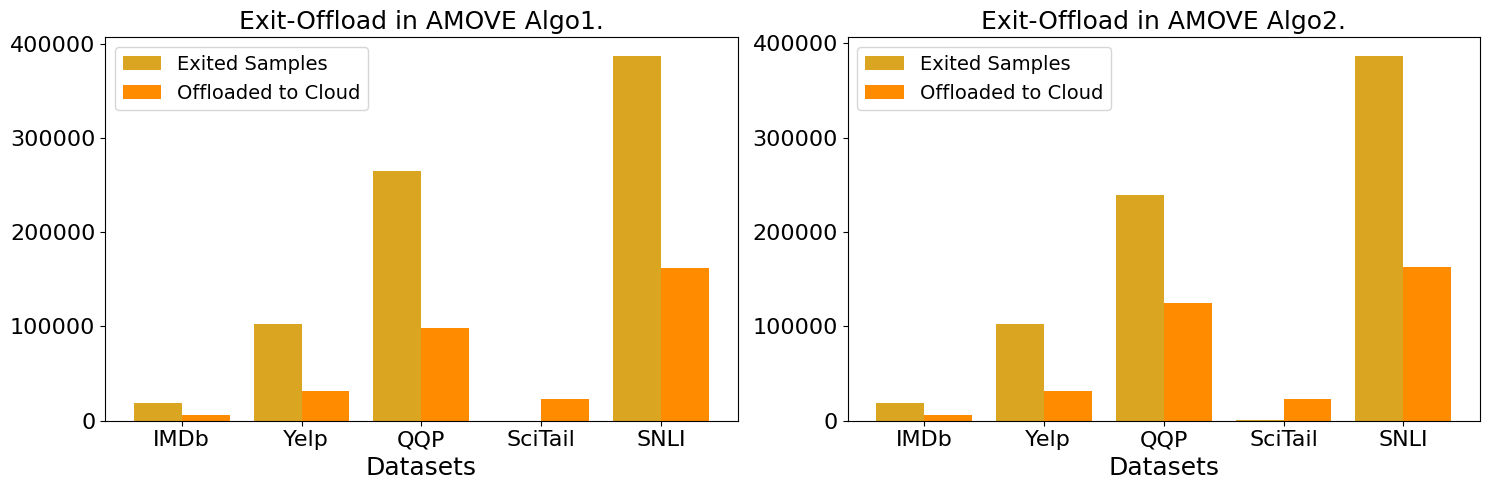

In [79]:
def ExitOffload_bar(ax_name,dataset_name,exiting_samples,offloadings_samples,Algorithm_name):
    x_axis = np.arange(len(dataset_name))
    ax_name.bar(x_axis -0.2,exiting_samples,width=0.4,label='Exited Samples',color='goldenrod')
    ax_name.bar(x_axis +0.2,offloadings_samples,width=0.4,label='Offloaded to Cloud',color='darkorange')
    ax_name.set_xlabel('Datasets',fontsize=18)
    ax_name.set_xticks(x_axis,dataset_name)   
    if Algorithm_name=='With SideInfo':
        ax_name.set_ylabel('Count of samples',fontsize=18)
    ax_name.tick_params(axis='x', labelsize=16)
    ax_name.tick_params(axis='y', labelsize=16)
    ax_name.set_title(f'Exit-Offload in {model_name} {Algorithm_name}',fontsize=18) # with threshold:{threshold[dataset_name]}')
    ax_name.legend(fontsize=14)

   
    

dataset_n=['IMDb',' Yelp','QQP','SciTail','SNLI']
exiting_sample=[exiting_with_sideInfo,exiting_withOut_sideInfo]
offloading_samples=[offloadings_with_sideInfo,offloadings_withOut_sideInfo]
algo_names=[algo1_name,algo2_name]

   
fig, ((ax1, ax2)) = plt.subplots(1, 2,figsize=(15, 5))
    
l=[ax1, ax2]

for i in range(2):
    ExitOffload_bar(l[i],dataset_n,exiting_sample[i],offloading_samples[i],algo_names[i])
fig.tight_layout()
fig.savefig("/home/divya/updated_code/Plots/bar_plot_exitOffload.pdf", format="pdf", bbox_inches="tight")
fig.show()

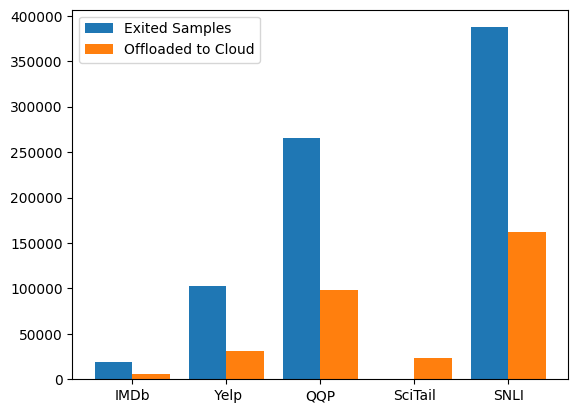

In [31]:
dataset_n=['IMDb',' Yelp','QQP','SciTail','SNLI']

x_axis = np.arange(len(dataset_n))

# Multi bar Chart

plt.bar(x_axis -0.2, exiting, width=0.4, label = 'Exited Samples')
plt.bar(x_axis +0., offloadings, width=0.4, label = 'Offloaded to Cloud')

# Xticks

plt.xticks(x_axis, dataset_n)

# Add legend

plt.legend()

# Display

plt.show()

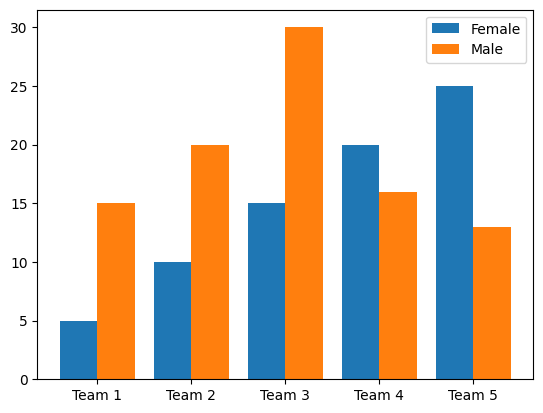

In [24]:

team = ['Team 1','Team 2','Team 3','Team 4','Team 5']
female = [5, 10, 15, 20, 25]
male = [15, 20, 30, 16, 13]

x_axis = np.arange(len(team))

# Multi bar Chart

plt.bar(x_axis -0.2, female, width=0.4, label = 'Female')
plt.bar(x_axis +0.2, male, width=0.4, label = 'Male')

# Xticks

plt.xticks(x_axis, team)

# Add legend

plt.legend()

# Display

plt.show()